# Missing Value Imputation

### Name the type of feature 
- **Numerical**
    - Discrete
    - Continuous
- **Categorical**
    - Nominal
    - Ordinal
- **Miscellaneous**
    - Date/Time
    - Mixed Variables

### Imputation Methods

- **Basic**
    - **Numerical**
        - Mean / Median Imputation
        - Arbitary Value Imputation
    - **Categorical**
        - Frequent category (Mode) Imputation
        - Adding a `missing` category
    - **Both Numerical and Categorical**
        - Adding a "Missing" indicator

---
- **Alternative**
    - **Numerical**
        - End of tail imputation
        - Mean or median imputation per group
    - **Both**
        - Complete Case Analysis
        - Random Sample Imputation
---
- **Multivariate analysis**
    - KNN Imputation
    - MICE (Multivariate Imputation of Chained Equations
    - MissForest - extends MICE using Random Forests

### Guideline for Missing Value Imputation

1. If missing values are present in less than 5% of the observations, 
    1. replace with `mean/median` for numerical
    2. replace with the `most frequent category (mode)` for categorical



2. If missing values are present in more than 5% of the observations, 
    1. do `mean/median` imputation and add a binary variable to capture nan values for numerical
    2. add a `missing` label in categorical variables

### **Behaviour of Machine Learning Algorithms on missing data**

- **Sensitive** 
    - Linear Regression
    - Logistic Regression
    - Support Vector Machines (SVM)
    - K-nearest Neighbours
    - K-means Clustering
    - Hierarchical Clustering
    - PCA
    - Neural Networks
    
    
- **Robust**
    - Naive Bayes Classifier
    - Decision Trees
    - Random Forests
    - GBM's (e.g., XG-Boost, CatBoost, Light GBM)
    - Ada Boost
    - Association Rule Mining (e.g., Apriori)
    

## Code Implementation

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

In [3]:
from sklearn import set_config
set_config(display='diagram')

In [4]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "BsmtQual",
    "FireplaceQu",
    "MSZoning",
    "Street",
    "Alley",
    "SalePrice",
]

In [5]:
data = pd.read_csv('../../houseprice.csv', usecols=cols_to_use)

In [6]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

X_train.shape, X_test.shape

((1022, 14), (438, 14))

In [7]:
X_train.isnull().mean().sort_values(ascending=False)

Alley          0.939335
FireplaceQu    0.467710
LotFrontage    0.184932
GarageYrBlt    0.052838
BsmtQual       0.023483
MasVnrArea     0.004892
MSZoning       0.000000
Street         0.000000
OverallQual    0.000000
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
dtype: float64

In [11]:
def only_missing_value_columns(data, plotting=True):
    # columns with only null values
    only_null = data.isna().sum()[data.isna().sum()>0].sort_values(ascending=False)
    
    # mean of missing values per column
    null_pct = data.isna().mean()[data.isna().mean()>0].sort_values(ascending=False)*100
    
    # missing values dataframe
    only_missing_values_df = pd.DataFrame({"Null_values":only_null,
                                   "pct_of_null_values":null_pct})
    
    null_values = only_missing_values_df['pct_of_null_values']
    
    # plotting missing values
    if plotting:
#         n_columns = len(data.columns)
#         column_width = 0.5
#         aspect_ratio = 2
#         fig_width = n_columns * column_width
#         fig_height = fig_width / aspect_ratio
        fig, ax = plt.subplots(figsize=(12,8))
        
        ax.bar(np.arange(len(null_values)), null_pct)
        ax.set_xticks(np.arange(len(null_values)), 
                      null_values.index, 
                      rotation='vertical')
        ax.set_xlabel('Features')
        ax.set_ylabel('% of missing data')
        ax.set_title('Missing Values Distribution')
        
        # Add values on the top of the bar
        for i, v in enumerate(null_pct):
            plt.text(i, v+0.1, str(round(v,1))+' %', ha='center', va='bottom')    
    
    if len(null_values) == 0:
        return "There are no missing values in this data"
    else:
        return only_missing_values_df
    

,Null_values,pct_of_null_values
Alley,960,93.933464
FireplaceQu,478,46.771037
LotFrontage,189,18.493151
GarageYrBlt,54,5.283757
BsmtQual,24,2.348337
MasVnrArea,5,0.489237


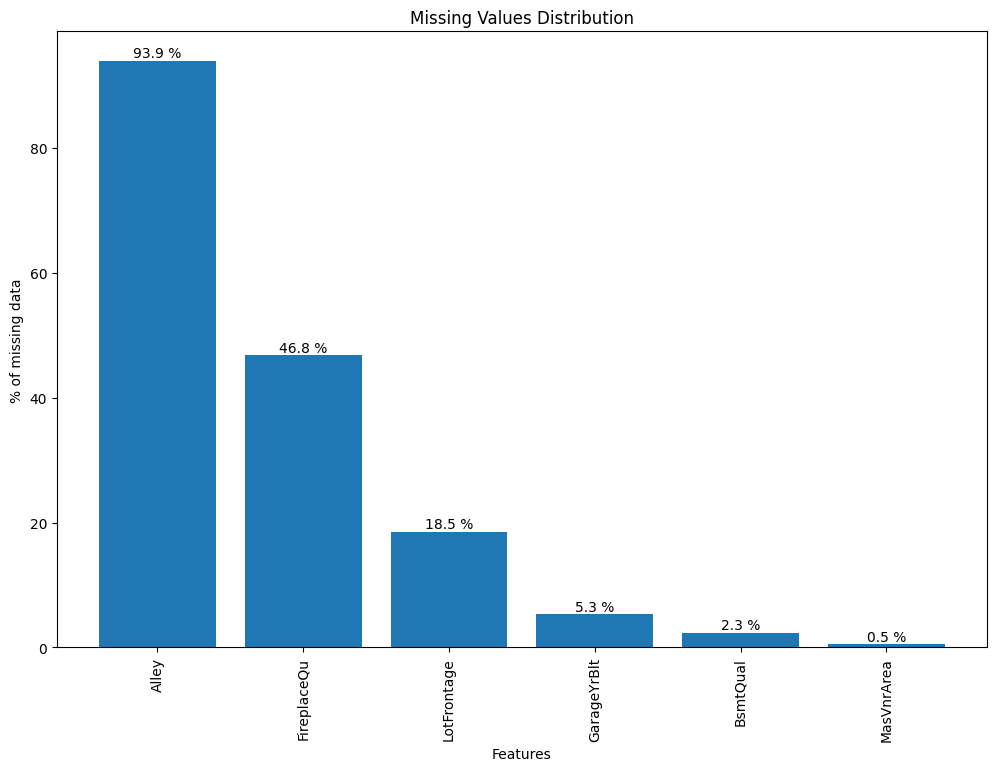

In [12]:
only_missing_value_columns(X_train)

## Column Transformer

In [13]:
columns = X_train.columns[X_train.isnull().mean() > 0].tolist()
columns

['LotFrontage',
 'Alley',
 'MasVnrArea',
 'BsmtQual',
 'FireplaceQu',
 'GarageYrBlt']

In [14]:
X_train[columns]

,LotFrontage,Alley,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt
64,NaN,NaN,573.0,Gd,NaN,1998.0
682,NaN,NaN,0.0,Gd,Gd,1996.0
960,50.0,NaN,0.0,TA,NaN,NaN
1384,60.0,NaN,0.0,TA,NaN,1939.0
1100,60.0,NaN,0.0,TA,NaN,1930.0
...,...,...,...,...,...,...
763,82.0,NaN,673.0,Gd,Gd,1999.0
835,60.0,NaN,0.0,Gd,NaN,1996.0
1216,68.0,NaN,0.0,NaN,NaN,1978.0
559,NaN,NaN,18.0,Gd,TA,2003.0


- Numerical
    - LotFrontage('median', add_indicator=True)
    - MasVnrArea (constant, fill_value = 0)
    - GarageYrBlt('median', add_indicator=True)
    ---
- Categorical
    - BsmtQual (frequent)
    - Alley (constant - 'missing', add_indicator=True)
    - FireplaceQu ('frequent', add_indicator=True)

In [15]:
numerical_median = ['LotFrontage', 'GarageYrBlt']
numerical_constant = ['MasVnrArea']

categorical_frequent = ['BsmtQual']
categorical_frequent_with_indicator = ['FireplaceQu']
categorical_constant = ['Alley']

In [16]:
impute_transformer = ColumnTransformer(
    transformers=[
        
        ('numerical_median', 
         SimpleImputer(strategy='median', add_indicator=True), 
         numerical_median),
        
        ('numerical_constant',
         SimpleImputer(strategy='constant', fill_value=0),
         numerical_constant),
        
        ('categorical_frequent',
        SimpleImputer(strategy='most_frequent'), 
        categorical_frequent),
        
        ('categorical_frequent_with_indicator',
        SimpleImputer(strategy='most_frequent', add_indicator=True),
        categorical_frequent_with_indicator),
        
        ('categorical_constant',
        SimpleImputer(strategy='constant', fill_value='missing', add_indicator=True),
        categorical_constant)
        
    ], 
    remainder='passthrough'
)

In [17]:
impute_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical_median',
                                 SimpleImputer(add_indicator=True,
                                               strategy='median'),
                                 ['LotFrontage', 'GarageYrBlt']),
                                ('numerical_constant',
                                 SimpleImputer(fill_value=0,
                                               strategy='constant'),
                                 ['MasVnrArea']),
                                ('categorical_frequent',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['BsmtQual']),
                                ('categorical_frequent_with_indicator',
                                 SimpleImputer(add_indicator=True,
                                               strategy='most_frequent'),
                                 ['FireplaceQu']),
                                ('categorical_constant',
                                 SimpleImputer(add_indicator=True,
                                               fill_value='missing',
                                               strategy='constant'),
                                 ['Alley'])])

In [18]:
impute_transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical_median',
                                 SimpleImputer(add_indicator=True,
                                               strategy='median'),
                                 ['LotFrontage', 'GarageYrBlt']),
                                ('numerical_constant',
                                 SimpleImputer(fill_value=0,
                                               strategy='constant'),
                                 ['MasVnrArea']),
                                ('categorical_frequent',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['BsmtQual']),
                                ('categorical_frequent_with_indicator',
                                 SimpleImputer(add_indicator=True,
                                               strategy='most_frequent'),
                                 ['FireplaceQu']),
                                ('categorical_constant',
                                 SimpleImputer(add_indicator=True,
                                               fill_value='missing',
                                               strategy='constant'),
                                 ['Alley'])])

In [19]:
impute_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical_median',
                                 SimpleImputer(add_indicator=True,
                                               strategy='median'),
                                 ['LotFrontage', 'GarageYrBlt']),
                                ('numerical_constant',
                                 SimpleImputer(fill_value=0,
                                               strategy='constant'),
                                 ['MasVnrArea']),
                                ('categorical_frequent',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['BsmtQual']),
                                ('categorical_frequent_with_indicator',
                                 SimpleImputer(add_indicator=True,
                                               strategy='most_frequent'),
                                 ['FireplaceQu']),
                                ('categorical_constant',
                                 SimpleImputer(add_indicator=True,
                                               fill_value='missing',
                                               strategy='constant'),
                                 ['Alley'])])

In [20]:
impute_transformer.transformers

[('numerical_median',
  SimpleImputer(add_indicator=True, strategy='median'),
  ['LotFrontage', 'GarageYrBlt']),
 ('numerical_constant',
  SimpleImputer(fill_value=0, strategy='constant'),
  ['MasVnrArea']),
 ('categorical_frequent',
  SimpleImputer(strategy='most_frequent'),
  ['BsmtQual']),
 ('categorical_frequent_with_indicator',
  SimpleImputer(add_indicator=True, strategy='most_frequent'),
  ['FireplaceQu']),
 ('categorical_constant',
  SimpleImputer(add_indicator=True, fill_value='missing', strategy='constant'),
  ['Alley'])]

In [22]:
X_train = impute_transformer.transform(X_train)
X_test = impute_transformer.transform(X_test)

In [24]:
X_train

,numerical_median__LotFrontage,numerical_median__GarageYrBlt,numerical_median__missingindicator_LotFrontage,numerical_median__missingindicator_GarageYrBlt,numerical_constant__MasVnrArea,categorical_frequent__BsmtQual,categorical_frequent_with_indicator__FireplaceQu,categorical_frequent_with_indicator__missingindicator_FireplaceQu,categorical_constant__Alley,categorical_constant__missingindicator_Alley,remainder__MSZoning,remainder__Street,remainder__OverallQual,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__1stFlrSF,remainder__GrLivArea,remainder__WoodDeckSF
64,69.0,1998.0,1.0,0.0,573.0,Gd,Gd,True,missing,True,RL,Pave,7,318,1057,1057,2034,576
682,69.0,1996.0,1.0,0.0,0.0,Gd,Gd,False,missing,True,RL,Pave,6,288,1291,1291,1291,307
960,50.0,1979.0,0.0,1.0,0.0,TA,Gd,True,missing,True,RL,Pave,5,162,858,858,858,117
1384,60.0,1939.0,0.0,0.0,0.0,TA,Gd,True,missing,True,RL,Pave,6,356,560,698,1258,0
1100,60.0,1930.0,0.0,0.0,0.0,TA,Gd,True,missing,True,RL,Pave,2,0,290,438,438,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,82.0,1999.0,0.0,0.0,673.0,Gd,Gd,False,missing,True,RL,Pave,8,89,1252,1268,2365,0
835,60.0,1996.0,0.0,0.0,0.0,Gd,Gd,True,missing,True,RL,Pave,4,625,1067,1067,1067,290
1216,68.0,1978.0,0.0,0.0,0.0,TA,Gd,True,missing,True,RM,Pave,6,0,0,1318,1902,0
559,69.0,2003.0,1.0,0.0,18.0,Gd,TA,False,missing,True,RL,Pave,7,1374,1374,1557,1557,143


### Deep Dive

**Linear Regression**:
- Linear regression can be sensitive to missing data, especially if the missingness is related to the dependent or independent variables.
 
**Logistic Regression**:
- Similar to linear regression, logistic regression can be affected by missing data. Missingness related to the dependent or independent variables can lead to biased estimates. The impact can be mitigated through appropriate imputation or modeling of missing data indicators.

**Support Vector Machines (SVM)**:
 - SVMs can be sensitive to missing data, especially if the missingness is related to the decision boundary. Missing values can affect the margin calculation and decision-making process of SVMs. Imputation methods or other techniques, such as using missing data indicators, may be required to handle missing values in SVMs.
 
 - SVM and Logistic Regression can have a relatively low impact if the missingness is not related to the decision boundaries.
 
**k-Nearest Neighbors (KNN)**:
- KNN is sensitive to missing data because it relies on measuring distances between data points. If missing values are not imputed or handled appropriately, it can lead to biased distance calculations and affect the performance of KNN.
 
**Principal Component Analysis (PCA)**:
 - PCA can be sensitive to missing data because it relies on calculating covariance matrices or eigenvectors. Missing values can affect these calculations and lead to biased results. Various imputation techniques or algorithms specifically designed for PCA with missing data, such as the Expectation-Maximization PCA (EMPCA), can be used to handle missing values in PCA.
 
**Clustering Algorithms (e.g., K-means, DBSCAN)**:
 - Clustering algorithms can be sensitive to missing data because they rely on distance or similarity measures between data points. Missing values can affect the calculation of distances and the clustering results. Imputation techniques or algorithms that can handle missing data, such as K-means with imputation or fuzzy clustering, can be used to mitigate the impact of missing values.
 
**Neural Networks**: 
 - Neural networks can be sensitive to missing data, especially if the missingness is substantial or related to important features. Missing values can disrupt the training process and lead to biased or inaccurate predictions. Preprocessing techniques, such as imputation or handling missing data indicators, may be necessary to minimize the impact of missing values on neural networks.
 
---
**Decision Trees**: 
 - Decision trees are relatively robust to missing data. They can handle missing values by selecting alternative paths in the tree based on the available data. Missing data is treated as a separate category and is not imputed or imputed implicitly.

**Random Forests**: 
 - Random forests build upon decision trees and inherit their ability to handle missing data effectively. Random forests create multiple decision trees on different subsets of the data, and missing data is handled naturally as a result of this process.

**Gradient Boosting Methods**: 
 - Gradient boosting algorithms, such as XGBoost or LightGBM, can handle missing data as well. Similar to decision trees, they can make decisions based on available data and treat missing values as a separate category during the tree-building process.

**Naive Bayes**: 
 - Naive Bayes classifiers are relatively robust to missing data. Missing values can be ignored during the probability estimation process since the conditional independence assumption in Naive Bayes allows for the contribution of available features to be used for classification. However, imputation methods can still be used to handle missing values if desired.

**Association Rule Mining**: 
 - Association rule mining algorithms are typically robust to missing data since they focus on identifying relationships between items or variables rather than relying on specific calculations affected by missing values. Missing values can be treated as a separate category or excluded from the analysis.